In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lynn310","key":"208beca6974a5ea1aa9fd1c4daea075c"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!pip install kaggle

!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions download -c house-prices-advanced-regression-techniques

    100% |████████████████████████████████| 61kB 5.3MB/s 
    100% |████████████████████████████████| 235kB 13.3MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/8b/21/3b/a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 9.19MB/s]
  0% 0.00/89.2k [00:00<?, ?B/s]
100% 89.2k/89.2k [00:00<00:00, 58.4MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 73.3MB/s]
  0% 0.00/82.0k [00:00<?, ?B/s]
100% 82.0k/82.0k [00:00<00:00, 49.1MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 95.1MB/s]
  0% 0.00/15.3k [00:00<?, ?B/s]
100% 15.3k/15.3k [00:00<00:00, 20.0MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 33.1MB/s]


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [0]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [0]:
dataset = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

In [0]:
dataset['Alley'].fillna(value='None', inplace=True)
dataset['BsmtCond'].fillna(value='None', inplace=True)
dataset['BsmtExposure'].fillna(value='None', inplace=True)
dataset['BsmtFinSF1'].fillna(value = 0, inplace = True)
dataset['BsmtFinSF2'].fillna(value = 0, inplace = True)
dataset['BsmtFinType1'].fillna(value='None', inplace=True)
dataset['BsmtFinType2'].fillna(value='None', inplace = True)
dataset['BsmtFullBath'].fillna(value = 0, inplace = True)
dataset['BsmtHalfBath'].fillna(value = 0, inplace = True)
dataset['BsmtQual'].fillna(value = 'None', inplace = True)
dataset['BsmtUnfSF'].fillna(value = 0, inplace = True)
dataset['Electrical'].fillna(value = 'Sbrkr', inplace = True)
dataset['Exterior1st'].fillna(value = 'VinylSd', inplace = True)
dataset['Exterior2nd'].fillna(value = 'VinylSd', inplace = True)
dataset['Fence'].fillna(value = 'None', inplace = True)
dataset['FireplaceQu'].fillna(value = 'None', inplace = True)
dataset['Functional'].fillna(value = 'Typ', inplace = True)
dataset['GarageCars'].fillna(value = 2.0, inplace = True)
dataset['GarageArea'].fillna(value = 519.43, inplace = True)
dataset['GarageCond'].fillna(value = 'None', inplace = True)
dataset['GarageQual'].fillna(value = 'None', inplace = True)
dataset['GarageType'].fillna(value = 'None', inplace = True)
dataset['GarageFinish'].fillna(value = 'None', inplace = True)
dataset['GarageYrBlt'].fillna(value = dataset['YearRemodAdd'], inplace = True)
dataset['KitchenQual'].fillna(value = 'TA', inplace = True)
dataset['LotFrontage'] = dataset.groupby('Neighborhood').transform(lambda x: x.fillna(x.mean())) 
dataset['MSZoning'].fillna(value = 'RL', inplace = True)
dataset.loc[2610 ,['MasVnrType']] = 'BrkFace' 
dataset['MasVnrType'].fillna(value = 'None', inplace = True)
dataset['MasVnrArea'].fillna(value = 0, inplace = True)
dataset['MiscFeature'].fillna(value = 'None', inplace = True)
dataset['PoolQC'].fillna(value = 'None', inplace = True)
dataset['SaleType'].fillna(value = 'WD', inplace = True)
dataset['TotalBsmtSF'].fillna(value = 'None', inplace = True)
dataset.drop(['Utilities', 'Id'], axis = 1, inplace = True)
dataset['TotalBsmtSF']=pd.to_numeric(dataset['TotalBsmtSF'], errors = 'coerce')

In [0]:
labeldict = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 }
labellist = ['BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual',
            'FireplaceQu', 'GarageCond', 'GarageQual', 'KitchenQual', 'HeatingQC', 'PoolQC']
for i in labellist:
    dataset[i].replace(labeldict, inplace = True)

In [0]:
dataset = pd.get_dummies(dataset)

In [0]:
dataset['SalePrice'] = np.log(dataset['SalePrice'])

In [0]:
from sklearn.preprocessing import StandardScaler
dataset.fillna(value = 0, inplace = True)
scaler = StandardScaler()
scaler.fit_transform(dataset)

train_data = dataset.iloc[0:1460][:]
test_data = dataset.iloc[1460:][:]
test_data = test_data.drop(columns = 'SalePrice')
test_data.loc[test_data['TotalBsmtSF'].isnull()]
test_data['TotalBsmtSF'].fillna(value = 0, inplace = True)

In [0]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Y = train_data['SalePrice']
X_train = train_data.drop(columns = 'SalePrice')
X_train, X_test, Y_, Y_test = train_test_split(X_train, Y, test_size = 0.2)

In [84]:
lasso = Lasso(alpha = 0.01, max_iter = 10000000, normalize = True, tol = 0.0004)
lasso.fit(X_train, Y_)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=10000000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0004, warm_start=False)

In [0]:
lasso_coef = lasso.coef_

In [86]:
scores = cross_val_score(lasso, X_test, Y_test, cv = 5)
print(scores.mean())

0.569949152763467


In [87]:
alphas = [0.0005, 0.001, 0.01, 0.05, 0.1]

def rmsle(regression_model, X, y):
    rmsle =np.sqrt(-(cross_val_score(regression_model, X, y, scoring = 'neg_mean_squared_error', cv = 5)))
    return rmsle

rmsle_result = []
for i in alphas:
    model = Lasso(alpha = i, max_iter = 10000)
    model.fit(X_tr, Y_tr)
    result = rmsle(model, X_dev, Y_dev).mean()
    rmsle_result.append(result)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [88]:
from sklearn.linear_model import LassoCV

lasso_model = LassoCV(alphas = [0.0005, 0.001, 0.01, 0.05, 0.1], max_iter = 1000000).fit(X_train, Y_)
print(rmsle(lasso_model, X_test, Y_test).mean())

0.14883471566867018


[0.0005, 0.001, 0.01, 0.05, 0.1]
[0.12380073026892917, 0.12387436092557724, 0.13257814247042987, 0.1579699086878937, 0.16690537828205593]


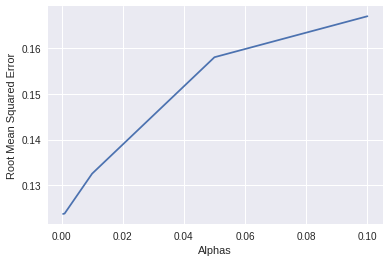

In [89]:
plt.plot(alphas, rmsle_result)
plt.xlabel('Alphas')
plt.ylabel('Root Mean Squared Error')
print(alphas)
print(rmsle_result)

In [90]:
final_lasso = Lasso(alpha = 0.0005, max_iter = 1000000).fit(X_train, Y_)
print(rmsle(final_lasso, X_test, Y_test).mean())

0.15752655270600996


In [91]:
# !pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(final_lasso).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1096 ± 0.0199,GrLivArea
0.0895 ± 0.0072,OverallQual
0.0320 ± 0.0064,YearBuilt
0.0315 ± 0.0090,OverallCond
0.0135 ± 0.0030,GarageArea
0.0082 ± 0.0020,GarageCars
0.0081 ± 0.0016,SaleCondition_Abnorml
0.0059 ± 0.0026,BsmtQual
0.0054 ± 0.0026,1stFlrSF
0.0052 ± 0.0006,TotRmsAbvGrd


In [0]:
features = ['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageArea', 'OverallCond', 'FireplaceQu',
           'YearRemodAdd', 'MSSubClass', 'LotArea', 'ScreenPorch', 'BsmtFinSF1', '1stFlrSF', 
           'TotalBsmtSF']

X_train1 = X_train[features]
X_test1 = X_test[features]
test_data1 = test_data[features]

In [93]:
alphas1=[0.0000001, 0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001,0.005,0.01,0.05, 0.1, 0.5]
rmsle_result1 = []
for i in alphas_1:
    model = Lasso(alpha = i, max_iter = 100000000)
    model.fit(X_train1, Y_)
    result = rmsle(model, X_test1, Y_test).mean()
    rmsle_result1.append(result)
print(rmsle_result1) 

[0.14315226476711435, 0.14315226845639534, 0.1431522855076291, 0.14315230698146209, 0.14315250366729937, 0.1431527854722329, 0.14315698587245085, 0.14316707600457507, 0.1434402773433005, 0.14425535403256878, 0.1639680711001118, 0.1730245203481707, 0.17568886050423424]


Text(0,0.5,'RMSLE')

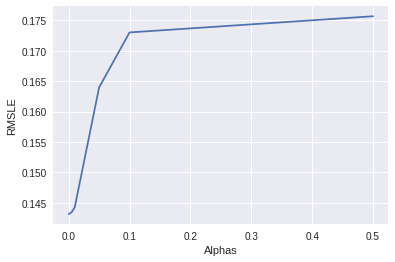

In [94]:
plt.plot(alphas_1, rmsle_result1)
plt.xlabel('Alphas')
plt.ylabel('RMSLE')

In [99]:
lasso_perm = Lasso(alpha = 0.0000001, max_iter = 100000000)
lasso_perm.fit(X_train1, Y_)

Lasso(alpha=1e-07, copy_X=True, fit_intercept=True, max_iter=100000000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
y_pred = lasso_perm.predict(test_data1)

In [101]:
print(len(df_test['Id']))
y_pred = np.exp(y_pred)
submission = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_pred})
submission.head()
submission.to_csv('lasso.csv', index = False)

1459
